In [1]:
import yt 
from yt_experiments.tiled_grid import YTTiledArbitraryGrid, YTPyramid
ds = yt.load_sample("IsolatedGalaxy")

yt : [INFO     ] 2024-08-19 15:30:58,749 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2024-08-19 15:30:58,885 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2024-08-19 15:30:58,886 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-08-19 15:30:58,886 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-19 15:30:58,887 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-08-19 15:30:58,888 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2024-08-19 15:29:05,366 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2024-08-19 15:29:05,501 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2024-08-19 15:29:05,501 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-08-19 15:29:05,501 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-19 15:29:05,502 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-08-19 15:29:05,502 Parameters: cosmological_simulation   = 0


In [7]:
tag = YTTiledArbitraryGrid(ds.domain_left_edge, 
                     ds.domain_right_edge, 
                     (800, 810, 820),
                     100,
                     ds = ds)

In [8]:
import os 
import numpy as np
dens = tag.to_zarr(("enzo", "Density"), 
                   os.path.abspath('.'), 
                  ops=[np.log10,])

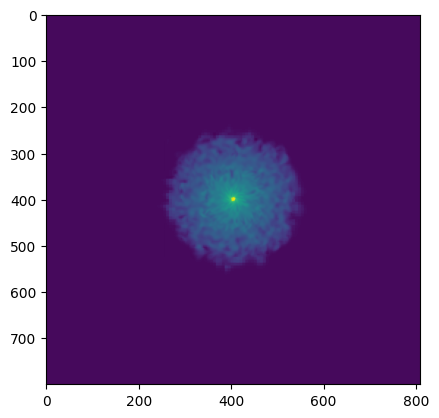

In [9]:
import matplotlib.pyplot as plt 

plt.imshow(dens[:,:,410])

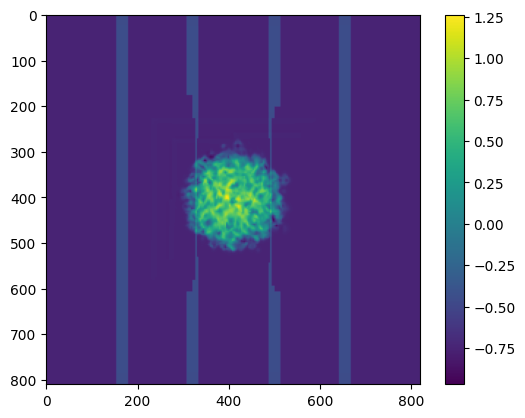

In [28]:
plt.imshow(dens[300,:,:])
plt.colorbar()

In [10]:
dens

<zarr.core.Array (800, 810, 820) float64>

In [11]:
import napari 

In [12]:
v = napari.Viewer()

In [25]:
v.add_image(dens, contrast_limits=(-1.5, 6.4))

<Image layer 'dens' at 0x7f802e645150>

In [16]:
np.min(dens[:,:,10])

np.float64(-0.7506047847022081)

In [22]:
ad = ds.all_data()

In [24]:
np.log10(ad.quantities.extrema(('enzo','Density')))

array([-1.51305128,  6.44733377])

In [29]:
import numpy as np 


In [34]:
levels = 3 
base_dims = np.array([100,110,120])
2**3

8

In [37]:
2**2

4

In [1]:
import yt 
from yt_experiments.tiled_grid import YTTiledArbitraryGrid, YTPyramid
ds = yt.load_sample("IsolatedGalaxy")

yt : [INFO     ] 2024-08-19 15:31:09,176 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2024-08-19 15:31:09,314 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2024-08-19 15:31:09,315 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-08-19 15:31:09,315 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-19 15:31:09,316 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-08-19 15:31:09,317 Parameters: cosmological_simulation   = 0


In [8]:
tag = YTPyramid(ds.domain_left_edge, 
                 ds.domain_right_edge, 
                 (2000, 2000, 2000),
                 100,
                 3,
                 ds = ds)

[2000. 2000. 2000.]
[1000. 1000. 1000.]
[500. 500. 500.]


In [9]:
import os 
import numpy as np
dens = tag.to_zarr(("enzo", "Density"), 
                   os.path.abspath('.'), 
                  ops=[np.log10,])

In [10]:
dens

[<zarr.core.Array (2000, 2000, 2000) float64>,
 <zarr.core.Array (1000, 1000, 1000) float64>,
 <zarr.core.Array (500, 500, 500) float64>]

In [5]:
import napari 
v = napari.Viewer()

In [12]:
v.add_image(dens, multiscale=True, contrast_limits=(-1.5, 6.4))

<Image layer 'dens' at 0x7f6136103510>